For citation information, please see the "Source Information" section listed in the associated README file: https://github.com/stephbuon/digital-history/tree/master/hist3368-week5-plotting-change-over-time/

# Instructions for Accessing Data

The purpose of this Notebook is to provide access and insight to the many data sets available to this course. 

You do **NOT** need to read every section of this Notebook. Instead, you can use **command + F / control + F** to skip to the data that is relevant for your research. 

These are the section names for the data:
- EDGAR Database
- Hansard (UK Parliament)
- US Congress
- Reddit Archive
- Dallas and Houston City Council Minutes
- NovelTM Datasets for English-Language Fiction, 1700-2009 (preferred source for c19 Novels)
- Project Gutenberg (backup source for c19 Novels)

*Many of the datasets include exercises for applying what we have learned from previous lessons -- for example, word clouds, word count, etc.  You should study these examples.  Pay particular attention to the REDDIT example as it is the most developed.*

#### Your First Job Today is to Successfully Load the Data

Some datasets are large enough that they will require larger memory allocations for successful work. Pay attention to anything that makes the kernel crash. If you experience this, start a new session with more memory.  The notes below hold clues about how much memory you might need.

#### Your Second Job Today is to Inspect Your Data.  What do the columns hold?

The final assignment asks you to apply some of what you have learned about working with tabular data.  To execute this assignment, you will need to **inspect** your data to understand what the column names mean.  
- Identify the *text* column in your dataset -- which is called 'speech' in some datasets, 'data' in others, 'body' in some, and 'text' in others.  
- You will also need to identify the *contributor* column -- which may be listed as the 'speaker,' 'author,' or something else.  

#### Your Third Job Today is to Apply What You Have Learned

The final assigment asks you to find the longest pieces of text in your dataset, their contributors, and to count the words in the longest pieces of text.  You will need to borrow code from previous problem sets to make this work. 

To borrow code successfully, you will need to make sure that the names of the columns match -- for instance, if the name of your text column is 'body,' you will have to change the problem set code where it calls the column 'speech.'

The basic commands you will use -- .count(), .replace(), .str.split().explode().dropna().value_counts() -- will be exactly the same for your assignment as they were in the previous problem sets.

In [1]:
import pandas as pd
import datetime as dt
#import dask

## EDGAR Database

[EDGAR](https://www.sec.gov/edgar.shtml) is a data base for the Securities and Exchange Commission. You can discover the data for a specific company in multiple ways, depending on your needs. 

We can perform a superficial search of the EDGAR data base by providing the `find_company_name()` method with a company name. The following code returns companies with  "Cisco System" in their name.

In [2]:
# This code is used to download the most up-to-date version of the data directly from EDGAR.  There have been problems with the connection. YMMV.
#import dask
#from edgar import Edgar
#edgar = Edgar()
#possible_companies = edgar.find_company_name("Cisco System")
#possible_companies

In the code below, we're loading EDGAR's data from a copy saved on M2.

In [3]:
df = pd.read_csv('/scratch/group/history/hist_3368-jguldi/edgar-data.csv')
df

,Company,Content,Period of Report
0,EXXON MOBIL CORP,usgaapusgovernmentdebtsecuritiesmember country...,2019-12-31
1,EXXON MOBIL CORP,united state security exchange commission wash...,2018-12-31
2,EXXON MOBIL CORP,united state security exchange commission wash...,2017-12-31
3,EXXON MOBIL CORP,united state security exchange commission wash...,2016-12-31
4,EXXON MOBIL CORP,united state security exchange commission wash...,2015-12-31
...,...,...,...
121,MARATHON PETROLEUM CORP,table content united state security exchange c...,2015-12-31
122,MARATHON PETROLEUM CORP,table content united state security exchange c...,2014-12-31
123,MARATHON PETROLEUM CORP,table content united state security exchange c...,2013-12-31
124,MARATHON PETROLEUM CORP,table content united state security exchange c...,2012-12-31


Let's get a rough sense of what's in the 'Content' Column by creating a wordcloud.

In [4]:
!pip install wordcloud --user
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
stop_words = set(STOPWORDS)

The wordcloud package has its own built-in function to split a block of text.  It just needs one big block of text assembled from all the rows in the 'Content' column.  We'll use the join() command to paste together all the entries in df['Content'], calling the result 'allwords.'  Then we'l use the WordCloud().generate() command to make a wordcloud from the variable 'allwords'.

In [5]:
from nltk.corpus import stopwords # this calls all multilingual stopword lists from NLTK
stop = stopwords.words('english') # this command calls only the English stopwords, labeling them "stop"
stop_set = set(stop) # use the Python native command "set" to streamline how the stopwords are stored, improve performance

In [ ]:
allwords = " ".join(df['Content'])
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(allwords)
plt.figure(figsize=(12, 12), dpi = 300)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Next, let's visualize the most frequent words, breaking the variable 'allwords' down into individual words using split().  

In [7]:
wordlist = allwords.split()
wordlist[:10] # look at the first ten elements of the list only

['usgaapusgovernmentdebtsecuritiesmember',
 'countryus',
 'usgaapforeignplanmember',
 'usgaapforeignplanmember',
 'usgaapagingofcapitalizedexploratorywellcostsperiodtwomember',
 'srtparentcompanymember',
 'countryus',
 'usgaapforeignplanmember',
 'usgaapnonusmember',
 'xomchemicalmember']

Those aren't words!  Surprise: EDGAR uses a lot of financial 'tags' which are strings of words strung together. You may need to strip these out by stopwording.

Next, count the individual words using the pandas commands "Series()" and "value_counts()"

In [8]:
wordcounts = pd.Series(wordlist).value_counts()[:20]
wordcounts[:10]

company      35236
million      29748
financial    27212
tax          23999
net          22314
year         22098
product      21980
cost         21721
asset        20824
income       20719
dtype: int64

Now, plot those values as a well-labeled barchart.  Notice that the axes are well-labeled and that the chart has a title that describes the data.

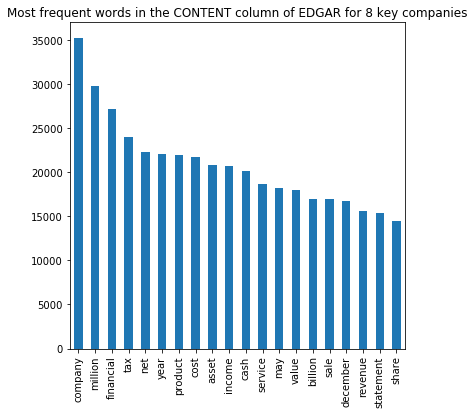

In [9]:
wordcounts.plot(kind='bar', 
                title='Most frequent words in the CONTENT column of EDGAR for 8 key companies',
                 figsize=(6, 6)
               )

## Hansard

Hansard is a data set of the 19th-century British Parliamentary debates. Please note: to use Hansard you must significantly increase the memory requested for your JupyterLab session. Per the README, you are suggested to request `64G`. This might result in a longer wait for launching your job but will allow you to hold all of the data in dataframe in memory.

In [10]:
import pandas as pd

hansard = pd.read_csv('/scratch/group/history/hist_3368-jguldi/hansard_justnine_12192019.csv')

hansard.head(5) # view just the first five rows

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,text,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20
0,S1V0001P0_0,S1V0001P0,0,0,0,0,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,moved that Lord Walsingham be appointed chairm...,Lord Hawkesbury,NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,Walsingham,PERSON,NaN
1,S1V0001P0_1,S1V0001P0,0,1,0,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"in seconding the motion, took an opportunity t...","The Lord Chancellor,",NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,NaN,NaN,NaN
2,S1V0001P0_2,S1V0001P0,0,2,1,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"—The question was put, and the appointment for...","The Lord Chancellor,",NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,NaN,NaN,NaN
3,S1V0001P0_3,S1V0001P0,0,3,0,2,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"then rose, and observed, that he was not in th...",Lord Walsingham,NaN,HOUSE OF LORDS.,S1V0001P0I0024,12.0,False,two,CARDINAL,NaN
4,S1V0001P0_4,S1V0001P0,0,4,1,2,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,He had to return his thanks to the House for t...,Lord Walsingham,NaN,HOUSE OF LORDS.,S1V0001P0I0024,12.0,False,"House,House,House","ORG,ORG,ORG",NaN


After loading the Hansard data we can take a subset so its is smaller and easier to work with. A subset can be thought of as a slice of the data containing just the criteria in which you are interested. 

This section will demonstrate two ways to take a subset: 1) by date and 2) by the contents of a column.

To subset the data by date, first convert the speechdate column from integers to datetimes objects.

In [11]:
hansard['speechdate']=pd.to_datetime(hansard['speechdate'], errors='coerce') # any errors are forced to NaN

Now you can filter for debates from before 1900 . . .

In [12]:
hansard1800s = hansard[hansard['speechdate']<dt.datetime(1900,1,1)]

In [13]:
hansard1800s.head(3)

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,text,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20
0,S1V0001P0_0,S1V0001P0,0,0,0,0,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,moved that Lord Walsingham be appointed chairm...,Lord Hawkesbury,NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,Walsingham,PERSON,NaN
1,S1V0001P0_1,S1V0001P0,0,1,0,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"in seconding the motion, took an opportunity t...","The Lord Chancellor,",NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,NaN,NaN,NaN
2,S1V0001P0_2,S1V0001P0,0,2,1,1,0,1803-11-22,[COMMITTEE OF PRIVILEGES]—,Uncategorized,"—The question was put, and the appointment for...","The Lord Chancellor,",NaN,HOUSE OF LORDS.,S1V0001P0I0024,11.0,False,NaN,NaN,NaN


. . . or debates from just the 1870s.

In [14]:
hansard_1870 = hansard[(hansard['speechdate'] >= dt.datetime(1870,1,1)) & (hansard['speechdate'] <= dt.datetime(1879,12,31))]

In [15]:
hansard_1870.head(3)

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,text,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20
4606897,S3V0199P0_0,S3V0199P0,0,0,0,342939,41076,1870-02-08,THE QUEEN'S SPEECH.,Uncategorized,delivered HER MAJESTY'S SPEECH to both Houses ...,THE LORD CHANCELLOR,NaN,"HOUSE OF LORDS,",S3V0199P0I0051,2.0,False,"SPEECH,Houses of Parliament","ORG,ORG",NaN
4606898,S3V0199P0_1,S3V0199P0,4,0,0,342940,41077,1870-02-08,THE QUEEN'S SPEECH— ADDRESS IN ANSWER TO HER M...,Uncategorized,"My Lords, I rise to move that a humble Address...",THE MARQUESS OF HUNTLY,NaN,"HOUSE OF LORDS,",S3V0199P0I0054,7.0,False,My Lords,PERSON,NaN
4606899,S3V0199P0_2,S3V0199P0,4,1,1,342940,41077,1870-02-08,THE QUEEN'S SPEECH— ADDRESS IN ANSWER TO HER M...,Uncategorized,I venture to ask your Lordships' indulgence in...,THE MARQUESS OF HUNTLY,NaN,"HOUSE OF LORDS,",S3V0199P0I0054,7.0,False,Lordships,ORG,NaN


The columns above are annotations that allow us to figure out how each speech corresponds to the nineteenth-century printed transcripts of speeches delivered in parliament.  "S3V0199P0_1" corresponds to the Third Session of Parliament, Volume 199, Page 0.  

The speeches are grouped into debates, given under the "debate" heading.  Because numerous debates have names like "REPORT," each debate has been assigned a debate_id number corresponding to all the speeches given on a particular date about the same subject. 

Each speech is also given a unique ID number for data purposes (speech_id).  Each section of the monologue has an id number, as does every sentence within the speech.  

#### Searching Parliamentary Data

You can also filter for speakers with the name "Gladstone." 

In [16]:
hansard1800s = hansard1800s[(hansard1800s['speaker'].str.contains('Gladstone'))].copy()

In [17]:
hansard1800s.head(3)

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,text,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20
269940,S1V0040P0_4623,S1V0040P0,2,12,0,25550,3377,1819-05-06,SECOND REPORT.,Uncategorized,", a member of the House, and a merchant princi...",Mr. Gladstone,NaN,HOUSE OF COMMONS.,S1V0040P0I0090,164.0,False,"House,East,West,Bank,two,three millions,Britis...","ORG,LOC,LOC,ORG,CARDINAL,CARDINAL,NORP,NORP",NaN
269941,S1V0040P0_4624,S1V0040P0,2,13,1,25550,3377,1819-05-06,SECOND REPORT.,Uncategorized,"After a full consideration of the evidence, an...",Mr. Gladstone,NaN,HOUSE OF COMMONS.,S1V0040P0I0090,164.0,False,"5th,July,Bank,Committee,5th","ORDINAL,DATE,ORG,ORG,ORDINAL",NaN
269942,S1V0040P0_4625,S1V0040P0,2,14,2,25550,3377,1819-05-06,SECOND REPORT.,Uncategorized,III.,Mr. Gladstone,NaN,HOUSE OF COMMONS.,S1V0040P0I0090,164.0,False,NaN,NaN,NaN


If you wanted to be more specific, you could return instances where speaker "Gladstone" utters the word "Dublin."

In [18]:
hansard1800s = hansard1800s[(hansard1800s['speaker'].str.contains('Gladstone'))&(hansard1800s['text'].str.contains('Dublin'))].copy()

In [19]:
hansard1800s.head(3)

,sentence_id,src_file_id,file_section_id,section_sentence_id,section_monologue_id,speech_id,debate_id,speechdate,debate,section_category,text,speaker,constituency,speaker_house,src_image,src_column,sentence_errata,sentence_entities,entity_labels,X20
1032945,S3V0018P0_7180,S3V0018P0,3,371,20,87660,9793,1833-06-03,MINISTERIAL PLAN FOR THE ABOLITION OF SLAVERY. ],Uncategorized,"and learned member for Dublin said, ""the blood...",Mr. William E. Gladstone,NaN,"HOUSE OF COMMONS,",S3V0018P0I0173,330.0,False,"Dublin,the West Indians","GPE,NORP",NaN
1258618,S3V0030P0_14983,S3V0030P0,3,28,8,104930,11485,1835-08-21,THE SUPPLIES. —CONDUCT OF THE PEERS. ],Uncategorized,Member for Dublin would seem to show influence...,Mr. William Ewart Gladstone,NaN,"HOUSE OF COMMONS,",S3V0030P0I0426,824.0,False,Dublin,GPE,NaN
1479435,S3V0042P0_4807,S3V0042P0,0,1135,194,119589,13199,1838-03-30,NEGRO APPRENTICESHIP—ADJOURNED DEBATE. ],Uncategorized,"That bill, says the hon. and learned Member fo...",Mr. W. E. Gladstone,NaN,"HOUSE OF COMMONS,",S3V0042P0I0118,224.0,False,"Dublin,O'Connell,the West Indies","GPE,PERSON,GPE",NaN


Hansard is a large file, so it's wise to remove it from memory after you have taken your subset. 

In [20]:
del hansard

## US Congress

Previously, we have given you code for loading Congress 1967-2010.  You are welcome to use this data for research purposes. However, we also have access to data for Congress from 1870 to 2010. 

US Congress data ([Stanford's Congressional Record](https://data.stanford.edu/congress_text)) is available on M2. If you use this data, please refer to the link for proper citation for the dataset.

The data lives within multiple text files. The following code merges these files into a single data frame.

> Note: as you read in the data you will see many `skipped line` warnings. This is okay. Jupyter is just telling you which lines we are skipping due to formatting errors.

In [ ]:
import csv
import glob

directory = '/scratch/group/oit_research_data/stanford_congress/hein-bound/'
file_type = 'txt'
delim ='|'

speeches_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, warn_bad_lines=False, quoting=csv.QUOTE_NONE) 
                         for f in glob.glob(directory + "speeches_*"+file_type)])

descr_df = pd.concat([pd.read_csv(f, sep=delim, encoding="ISO-8859-1", error_bad_lines=False, warn_bad_lines=False, quoting=csv.QUOTE_NONE) 
                      for f in glob.glob(directory + "descr_*"+file_type)])

all_congressional_data = pd.merge(speeches_df, descr_df, on='speech_id').fillna(0)

In [22]:
all_congressional_data

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
0,740000001,The Chair lays before the Senate the credentia...,S,19350103,1,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,48,51,01031935.txt,184,32
1,740000002,(John C. Crockett) proceeded to read the certi...,S,19350103,2,The Chief Clerk,Unknown,Unknown,Unknown,Special,52,54,01031935.txt,124,21
2,740000003,Mr. President. I suggest that credentials foun...,S,19350103,3,Mr. ROBINSON,Unknown,ROBINSON,Unknown,M,55,57,01031935.txt,153,30
3,740000004,Is there objection to the request? The Chair h...,S,19350103,4,The VICE PRESIDENT,Unknown,Unknown,Unknown,Special,58,62,01031935.txt,238,44
4,740000005,Secretary of State.,S,19350103,5,Mrs. MARGUERITE P. BACA,MARGUERITE P.,BACA,Unknown,F,273,275,01031935.txt,19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17394636,940382525,Mr. Speaker. it is a great personal honor for ...,E,19761001,4819,Mr. BIAGGI,Unknown,BIAGGI,Unknown,M,383002,383082,10011976.txt,2782,453
17394637,940382526,Mr. Speaker. given the fact that Chairman MADD...,E,19761001,4820,Mr. PHILLIP BURTON,PHILLIP,BURTON,Unknown,M,383088,383104,10011976.txt,337,60
17394638,940382527,Mr. Speaker. taie 94th Congress has officially...,E,19761001,4821,Mr. JOHNSON of California,Unknown,JOHNSON,California,M,383111,383127,10011976.txt,586,102
17394639,940382528,designateApril 24 as a National Day of Remembr...,E,19761001,4822,For.-......To,Unknown,......TO,Unknown,M,383248,383342,10011976.txt,6066,892


After loading the data, you can take a subset. The following code filters the speaker column for just the speaker "Mr. Dole."

In [23]:
bob_dole = all_congressional_data[(all_congressional_data.speaker == "Mr. DOLE")].copy()

In [24]:
bob_dole[:5]

,speech_id,speech,chamber,date,number_within_file,speaker,first_name,last_name,state,gender,line_start,line_end,file,char_count,word_count
617680,970000180,Mr. President. despite all the debate over tax...,S,19810105,180,Mr. DOLE,Unknown,DOLE,Unknown,M,3410,3425,01051981.txt,602,107
617687,970000187,Mr. President. I send to the desk a bill to cl...,S,19810105,187,Mr. DOLE,Unknown,DOLE,Unknown,M,6423,6427,01051981.txt,147,25
617689,970000189,Mr. President. today I am introducing legislat...,S,19810105,189,Mr. DOLE,Unknown,DOLE,Unknown,M,6880,6890,01051981.txt,409,60
617690,970000190,Mr. President. one of the most pressing and se...,S,19810105,190,Mr. DOLE,Unknown,DOLE,Unknown,M,7015,7022,01051981.txt,297,47
617692,970000192,Mr. President. the Senator from Kansas today w...,S,19810105,192,Mr. DOLE,Unknown,DOLE,Unknown,M,7582,7662,01051981.txt,2657,438


You have already seen examples of working with the Congress data.

## Reddit Archive

**DISCLAIMER**: The Reddit data is broken into 92 (yes, 92!) files totalling ~250G of Reddit data. This is big data!!! You can access individual files using ~`6-15G`, but please see Steph if you need help.

The reddit data is separated by month (Oct. 2007 to May 2015). Later dates are larger in file size, so you may need to allocated more memory in your JupyterLab session before reading them. September 2010, for example, is only 1G while May 2015 is over 12G.

To create a data frame of reddit data:

In [1]:
import pandas as pd
from datetime import datetime
import glob

reddit_files = glob.glob('/scratch/group/oit_research_data/reddit/*.tsv') # you can replace astrict with a specific reddit file if you want to read just one file

# Add or remove entries to this list to change which months are loaded
DATES_TO_LOAD = [
    # (year, month),
    (2008, 10),
    (2008, 11),
]

list_dfs = []
for file in reddit_files:
    filename = file.rsplit('/', maxsplit=1)[-1].rsplit('.', maxsplit=1)[0]
    filetime = datetime.strptime(filename, 'RC_%Y-%m')
    if (filetime.year, filetime.month) in DATES_TO_LOAD:
        list_dfs.append(pd.read_csv(file, sep='\t'))

reddit_df = pd.concat(list_dfs)
del list_dfs[:]

# Recommended: drop deleted comments from your dataset    
reddit_df = reddit_df[reddit_df['body'] != '[deleted]']

# Drop instances of NaN (empty comments)
reddit_df = reddit_df[~reddit_df['body'].isna()]

# Subreddit filtering example:
subreddit_filter = ('politics', 'worldnews', 'news')
reddit_df=reddit_df[reddit_df['subreddit'].isin(subreddit_filter)]

display(reddit_df)

,Unnamed: 0,body,created_utc,downs,id,link_id,parent_id,subreddit,subreddit_id,ups
1,1,"Dude, your phone is ringing Dude... Dude, your...",1225497628,0,c064gt4,t3_7ajhj,t1_c0648hy,news,t5_2qh3l,0
7,7,"Ask her to do it with her mouth full. Nudge, k...",1225497666,0,c064gta,t3_7ak8x,t1_c064dd3,worldnews,t5_2qh13,2
22,23,"There's a difference between subtle, tasteful ...",1225497747,0,c064gtq,t3_7aklv,t1_c064c5m,politics,t5_2cneq,8
23,24,"Holy shit, not only was my ad. a floater, mine...",1225497749,0,c064gtr,t3_7aklv,t1_c064b44,politics,t5_2cneq,2
29,30,Do you know what they call Proposition 8 in Ho...,1225497763,0,c064gtx,t3_7ajk1,t3_7ajk1,politics,t5_2cneq,1
...,...,...,...,...,...,...,...,...,...,...
782844,789835,"MOR-MONS DE-TEC-TED. LAUNCH MISSILES, *EXTERMI...",1225497473,0,c064gs0,t3_7ai4f,t1_c0646rv,politics,t5_2cneq,1
782853,789844,It is not a matter of not remembering. The do ...,1225497503,0,c064gs9,t3_7amd9,t3_7amd9,politics,t5_2cneq,1
782859,789850,"If she misunderstands or, even worse, purposef...",1225497524,0,c064gsf,t3_7aklv,t3_7aklv,politics,t5_2cneq,40
782878,789869,It's either that or military power according t...,1225497583,0,c064gsy,t3_7amdg,t1_c064gqo,politics,t5_2cneq,1


> Note that `reddit_files = glob.glob('/scratch/group/oit_research_data/reddit/*.tsv')` can be replaced with a specific reddit file to avoid loading ALL of the data. Consider: `reddit_files = glob.glob('/scratch/group/oit_research_data/reddit/RC_2008-10.tsv')` for just October 2008.

After reading the data, we can take a subset through various ways.

For example, we can filter the reddit data frame for specific subreddits, like those containing the word "climate."

In [2]:
subset_by_keyword = reddit_df[(reddit_df['body'].str.contains('climate'))].copy()

In [3]:
subset_by_keyword

,Unnamed: 0,body,created_utc,downs,id,link_id,parent_id,subreddit,subreddit_id,ups
6607,6721,The structure of the Times report is interesti...,1225533808,0,c064m04,t3_7amm7,t3_7amm7,worldnews,t5_2qh13,1
14953,15160,Homosexuality generally is unaccepted by most ...,1225571224,0,c064sio,t3_7am9j,t1_c064nci,politics,t5_2cneq,1
54316,54841,"McCain himself might not be W, but we now have...",1225726347,0,c065n85,t3_7azp1,t1_c065mdb,politics,t5_2cneq,3
72058,72685,IF MCCAIN WINS * impotent man gets election * ...,1225764393,0,c06611n,t3_7b4yh,t3_7b4yh,politics,t5_2cneq,3
85022,85741,i figure if i'm on an island in a tropical cli...,1225810169,0,c066b53,t3_7b8fj,t1_c066b2h,politics,t5_2cneq,4
...,...,...,...,...,...,...,...,...,...,...
769587,776486,2. Foreign Oil dependency is a big problem. We...,1225466210,0,c0646gf,t3_7ad8k,t1_c0644p8,politics,t5_2cneq,1
773417,780339,Of the 15 bills Senator Obama sponsored or co-...,1225474301,0,c0649fv,t3_7ajoj,t1_c0649fr,politics,t5_2cneq,1
777958,784920,Banks take a big loss when the have to foreclo...,1225484234,0,c064czd,t3_7akwu,t3_7akwu,worldnews,t5_2qh13,16
779100,786066,This is classic far right wing insecurities on...,1225486720,0,c064dv7,t3_7aklv,t3_7aklv,politics,t5_2cneq,91


#### Practice searching and counting with Reddit

Now that we have practiced reading in the data, let's do something with it! 

For this first exercise we will just count top words in the reddit data from November 2008.

First read in the data:

In [4]:
reddit_df = pd.read_csv('/scratch/group/oit_research_data/reddit/RC_2008-11.tsv', sep='\t')

reddit_df[:5]

,Unnamed: 0,body,created_utc,downs,id,link_id,parent_id,subreddit,subreddit_id,ups
0,0,[deleted],1225497606,0,c064gt3,t3_7ajem,t3_7ajem,reddit.com,t5_6,1
1,1,"Dude, your phone is ringing Dude... Dude, your...",1225497628,0,c064gt4,t3_7ajhj,t1_c0648hy,news,t5_2qh3l,0
2,2,What with incest being illegal in most countri...,1225497629,0,c064gt5,t3_7a9re,t1_c0645i0,WTF,t5_2qh61,1
3,3,[deleted],1225497640,0,c064gt6,t3_7ahln,t3_7ahln,funny,t5_2qh33,1
4,4,"&gt; Also, a blue-ring's bite is totally painl...",1225497654,0,c064gt7,t3_7ahln,t1_c064838,funny,t5_2qh33,10


Great. Now let's do a little cleaning for a better outcome:

In [5]:
# remove comments that have been deleted and thus have "deleted" as their text body
reddit_df = reddit_df[reddit_df['body'] != '[deleted]']

# filter for just the subreddits we wish to operate on
subreddit_filter = ('politics', 'worldnews', 'news')
reddit_df = reddit_df[reddit_df['subreddit'].isin(subreddit_filter)]

# load stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')
stopwords_regex = r'\b(?:{})\b'.format('|'.join(stop))

# clean, clean, clean 
reddit_df['body'] = reddit_df['body'].str.lower() # transform words to lowercase
reddit_df['body'] = reddit_df['body'].str.replace('[^\w\s]','') # remove punctuation
reddit_df['body'] = reddit_df['body'].str.replace(stopwords_regex,'') # remove stopwords

reddit_df = reddit_df[~reddit_df['body'].isna()] # remove blank comments

[nltk_data] Downloading package stopwords to
[nltk_data]     /users/jguldi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Let's look at our cleaned data!

In [6]:
reddit_df[:5]

,Unnamed: 0,body,created_utc,downs,id,link_id,parent_id,subreddit,subreddit_id,ups
1,1,dude phone ringing dude dude phone ringing,1225497628,0,c064gt4,t3_7ajhj,t1_c0648hy,news,t5_2qh3l,0
7,7,ask mouth full nudge know mean wink nudge,1225497666,0,c064gta,t3_7ak8x,t1_c064dd3,worldnews,t5_2qh13,2
22,23,theres difference subtle tasteful ads ones ...,1225497747,0,c064gtq,t3_7aklv,t1_c064c5m,politics,t5_2cneq,8
23,24,holy shit ad floater mine movie trailer...,1225497749,0,c064gtr,t3_7aklv,t1_c064b44,politics,t5_2cneq,2
29,30,know call proposition 8 holland,1225497763,0,c064gtx,t3_7ajk1,t3_7ajk1,politics,t5_2cneq,1


To count top words we need to operate on the `body` column. We can't go straight to counting words from here, however.

To a human reader, every word in the body column appears as a separate, individual word. These words are easy for us to count. But, this isn't the case to for a machine reader. At its present state, a machine reads the text in each row as an entire unit. For this reason, we need to split the words of each row on the spaces. 

The following code splits the words into individual tokens that a computer can read (split()), then "explodes" the words so that each word gets one line, then counts them.

In [7]:
reddit_count = reddit_df["body"].str.split().explode().dropna().value_counts()
reddit_count[:10]

people    24954
would     19513
like      17542
dont      17406
one       14623
think     14276
get       12089
im        11875
obama     10886
us        10279
Name: body, dtype: int64

Great--we have counted every word.

Looking at this output, however, reveals a problem: words like "what," "with," or "to" have high word counts! If we were to visualize the top words without some additional cleaning we might end up with a visualization of "the" or "and," which doesn't tell us anything interesting about our data: the subreddits for politics, world news, and news.

Data scientists often call these bloat words "stop words" and remove them from the data. We can do this by defining a list of stop words and removing items from `reddit_count` that match a stop word. 

> Note: removing stop words requires careful consideration. The following list removes pronouns like "he" or "she," which is useful here, but would be detrimental for an analysis on gender.

In [39]:
custom_stopwords = ['dont', 'im', 'thats', 'way', 'going', 'youre', 'gt', 'doesnt', 'said', 'point', 'actually', 'cant', 'thing',
                    'much', 'could', 'well', 'see', 'may', 'give', 'look', 'use', 'someone', 'anyone', 'anything', 'something', 'make', 
                    'also', 'go', 'say', 'still', 'mean', 'even', 'get', 'one', 'like', 'really', 'would', 'many', 'really', 'take', 'first',
                    'think', 'want', 'nothing', 'made', 'though', 
                   'didnt', 'things', 'isnt', 'sure', 'yes', 'two', 'hes', 'got', 'every', 'lot', 'saying', 'anyone', 'probably', 'oh']

custom_stopwords_regex = r'\b(?:{})\b'.format('|'.join(custom_stopwords))
reddit_df['body'] = reddit_df['body'].str.replace(custom_stopwords_regex,'') # remove stopwords

Let's count again and look at the difference: 

In [40]:
reddit_count = reddit_df["body"].str.split().explode().dropna().value_counts()
reddit_count[:10]

people        24954
obama         10886
us            10279
right          9352
know           9123
time           8021
good           7705
government     6992
vote           6162
years          5706
Name: body, dtype: int64

Now we can plot our data.

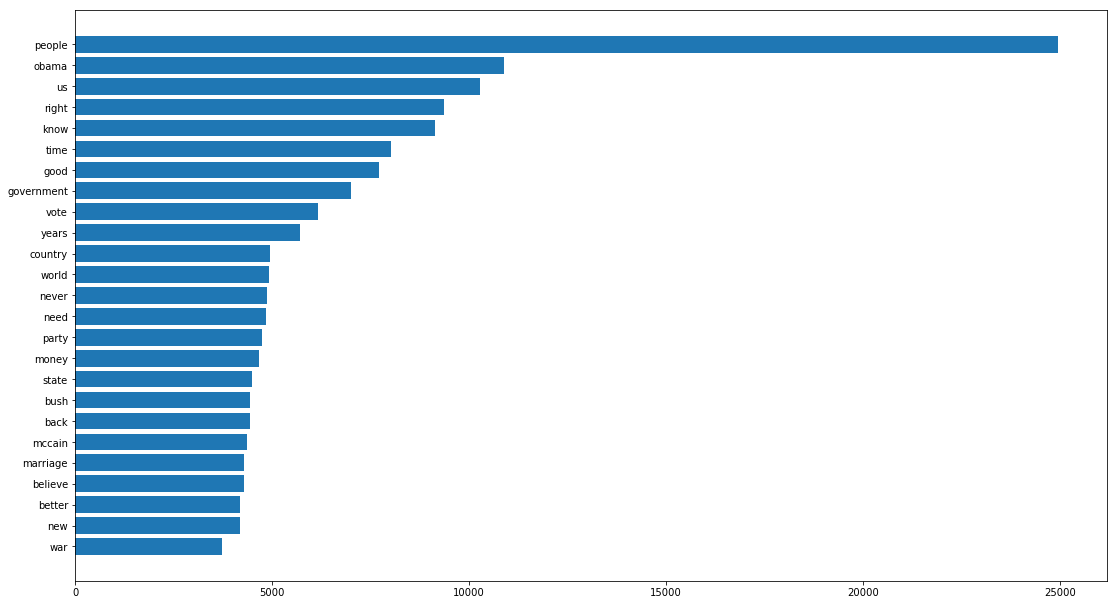

In [41]:
import matplotlib
import matplotlib as plt
import matplotlib.pyplot as plt

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.barh(reddit_count.index[:25], reddit_count[:25]) # visualize the count. 
plt.gca().invert_yaxis() # reverse the order of the bars so the biggest one is on top

Let's also plot our data using a scatter plot. We will substitute `barh()` (for horizontal bar chart) with `scatter()`.

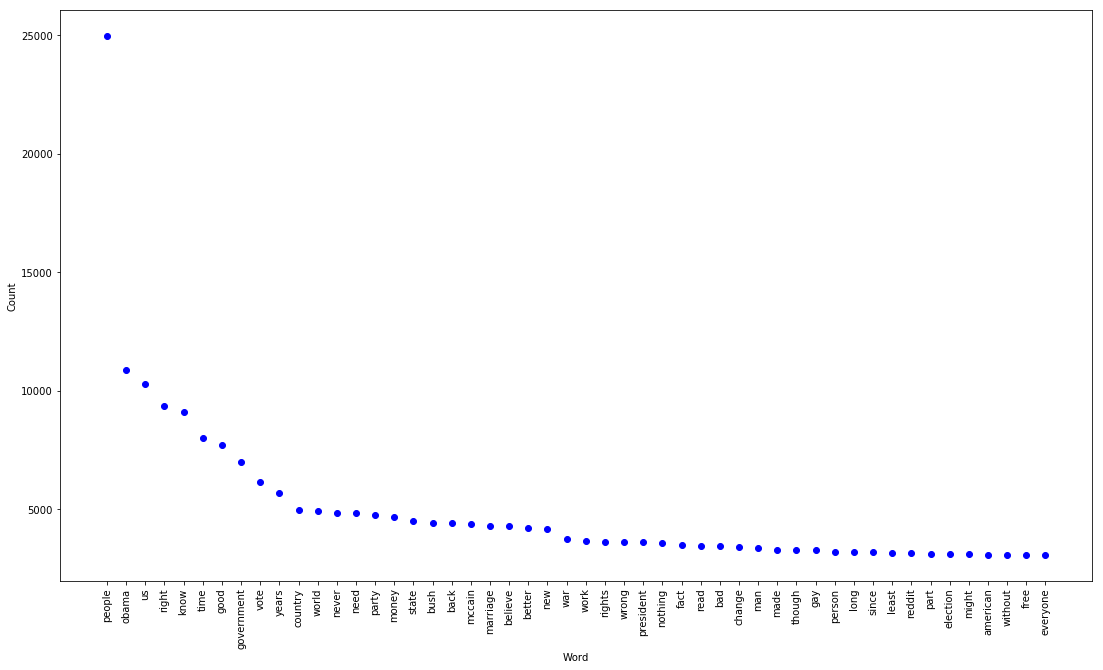

In [42]:
%matplotlib inline
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plt.scatter(reddit_count.index[:50], reddit_count[:50], color='blue')
plt.ylabel("Count")
plt.xlabel("Word")
plt.xticks(rotation=90)
plt.show()

## Dallas and Houston City Council Minutes

This section gives access infomration for two separate datasets: the Dallas City Council minutes and the Houston City Council minutes. 


In [ ]:
from datetime import datetime

council_dir = '/scratch/group/history/hist_3368-jguldi/city_council'

dallas_minutes = pd.read_csv(f'{council_dir}/dallas.csv', sep='|', index_col='index') # read in the Dallas City Council minutes
dallas_minutes['Date'] = pd.to_datetime(dallas_minutes['Date'], format='%Y-%m-%d') # cast the data column to datetime objects 

houston_minutes = pd.read_csv(f'{council_dir}/houston.csv', sep='|', index_col='index')# read in the Houston City Council minutes
houston_minutes['Date'] = pd.to_datetime(houston_minutes['Date'], format='%Y-%m-%d') # cast the data column to datetime objects 

print(dallas_minutes[:5])
houston_minutes[:5]

Like the previous examples, you can take a subset of the data. The following code filters for data from before January 1, 2000. 

In [ ]:
dallas_minutes[dallas_minutes['Date'] < datetime(year=2000, month=1, day=1)][:5]

The following code filters for data from just the month of September.

In [ ]:
houston_minutes[houston_minutes['Date'].dt.month == 9][:5]

The following code filters for data from just Tuesday.

In [ ]:
houston_minutes[houston_minutes['Date'].dt.day_name() == 'Tuesday']

## NovelTM Datasets for English-Language Fiction, 1700-2009

The NovelTM datasets are a collection of metadata for 210,305 volumes of fiction. Performing quantitative measures with these datasets can lend insight into literary history. The types of questions a researcher might ask include: how does the proportion of fiction written by British authors or by women change across time?

The NovelTM datasets are vast. They include files that can be used to determine authorial gender, standardize author names, detect nationality, and more. These files are spread across different folders. This section will only focus on a few of these folders and their data sets. You are welcome to explore the data that isn't covered in this Notebook by reading the `readme.md` file. 

For citation information, please see [this link](https://culturalanalytics.org/article/13147-noveltm-datasets-for-english-language-fiction-1700-2009).

#### Reading Datasets of Interest

1.The Title Metadata

In [ ]:
path_to_noveltm_metadata = "/scratch/group/history/hist_3368-jguldi/tedunderwood-noveltmmeta-451ae72/metadata"

title_metadata = pd.read_csv(f'{path_to_noveltm_metadata}/titlemeta.tsv', sep='\t')

title_metadata.head(10)

2.The Gender-Balanced Subset

The gender-balanced subset was taken from a fiction titles data frame. It has been reduced in size to ensure equal representation of writers who were identified as men or women in each 5-year segment of time. The curators also included a proportional sample of texts where gender was marked "unknown."

In [ ]:
gender_balanced_subset = pd.read_csv(f'{path_to_noveltm_metadata}/gender_balanced_subset.tsv', sep='\t')

gender_balanced_subset.head(10)

3.The Frequently Reprinted Subset

The frequently reprinted subset was taken from a fiction titles data frame. It is made up of volumes where the curators had the largest number of editions and instances attested within 25 years of a title's first appearance in HathiTrust.

In [ ]:
frequently_reprinted_subset = pd.read_csv(f'{path_to_noveltm_metadata}/frequently_reprinted_subset.tsv', sep='\t')

frequently_reprinted_subset.head(10)

4.Author Set (a list of authors and their standardized names)

In [ ]:
path_to_noveltm_dedup = "/scratch/group/history/hist_3368-jguldi/tedunderwood-noveltmmeta-451ae72/dedup/"

authorsets = pd.read_csv(f'{path_to_noveltm_dedup}/authorsets.tsv', sep='\t')

authorsets.head(10)

#### Exploring NovelTM 

If you want to further explore NovelTM you can read the `readme.md` file and open files in different directories. 

Here's a little knowledge that can help you explore the data:

The different directories (main directories and sub directories) make up a "file hierarchy." You can view NovelTM's file hierarchy like so:

In [ ]:
import glob 

path_to_noveltm = "/scratch/group/history/hist_3368-jguldi/tedunderwood-noveltmmeta-451ae72/"

glob.glob('{}/*'.format(path_to_noveltm))

Each of the names at the end of path represent a folder containing data (minus LICENSE and `readme.md`). You can open a folder by adding it to the directory path defined above. 

In [ ]:
path_to_noveltm = "/scratch/group/history/hist_3368-jguldi/tedunderwood-noveltmmeta-451ae72/metadata/"

glob.glob('{}/*'.format(path_to_noveltm))

Note that from the `metadata` folder we only opened `titlemeta.tsv`, `gender_balanced_subset.tsv` and `frequently_reprinted_data.tsv`, but there are many more files!

Jupyter does not offer an easy interface to navigate and understand files. For purposes of exploration, you should consider opening a Shell and using the command `cd /scratch/group/history/hist_3368-jguldi/tedunderwood-noveltmmeta-451ae72"` followed by `ls`. This interface will show all the files in a directory. The folders you can change into are in blue font, whereas data is in white font and ends with `.tsv`.

## Project Gutenberg

[Project Gutenberg](https://www.gutenberg.org/) is a library of over 60,000 digitized books in the public domain. It is best known for its abundant literary texts.

First import the modules for accessing and processing the Project Gutenberg text.

In [ ]:
from gutenberg.acquire import load_etext
from gutenberg.query import get_metadata
from gutenberg.cleanup import strip_headers

gutenberg_mirror = 'https://gutenberg.pglaf.org/' # the mirror from which we will access and download books

If you have used Project Gutenberg before, you may have noticed that at the top of each html page is meta data that looks something like this: 

> The Project Gutenberg EBook of Pride and Prejudice, by Jane Austen
>
> This eBook is for the use of anyone anywhere at no cost and with
> almost no restrictions whatsoever.  You may copy it, give it away or
> re-use it under the terms of the Project Gutenberg License included
> with this eBook or online at www.gutenberg.org
> 
>Title: Pride and Prejudice
> 
> Author: Jane Austen
> 
> Release Date: August 26, 2008 [EBook #1342]
> Last Updated: November 12, 2019
> 
> Language: English
> 
> Character set encoding: UTF-8

Important to note is the EBook #1342 ID tag. Using the gutenberg Python module, you can download books based on this ID. Here is an example:

In [ ]:
books = [
    [1342,"Pride and Prejudice","Jane Austen"],
    [11,"Alice's Adventures in Wonderland", "Lewis Carroll"],
    [2701,"Moby Dick; Or, The Whale","Herman Melville"],
    [84,"Frankenstein; Or, The Modern Prometheus", "Mary Wollenstonecraft Shelley" ],
    [345,"Dracula", "Bram Stoker"]
]

Create a data frame from the books variable that has columns for the ID, Title, and Author

In [ ]:
gutenDF = pd.DataFrame(books, columns=['ID','Title','Author']) 

Now we load the books' full text. We will call it 'FullText.'

We will not teach the commands below -- however, you will recognize .replace("\n", ""), the command to remove whitespace.

In [ ]:
gutenDF['FullText'] = gutenDF.apply(lambda row: strip_headers(load_etext(row['ID'], mirror=gutenberg_mirror)).replace("\n", "").replace("[Illustration]", "") , axis=1)

gutenDF

Look at the FullText column above.  You will still need to lowercase, strip punctuation, and possibly stopword the FullText to work with it.

#### Search c19 Novels for words

We can filter our returns based on criteria, such as the characters a title contains. The following code searches the `Title` column for the word "Whale" and returns the full text.

In [ ]:
whale = gutenDF[gutenDF['Title'].str.contains("Whale")]['FullText'].copy()
whale

Searching for titles that contains "Whale" returns __Moby Dick__.

#### MetaData and Caching

If you plan on doing a lot of work with Project Gutenberg's metadata functionality, you'll need to cache their metadata first. This can take a very long time but makes it possible to query their metadata quickly.

We will not use the commands below for now, but they are included for later problem-solving.

In [ ]:
# from gutenberg.acquire import get_metadata_cache
# cache = get_metadata_cache()
# cache.populate()

In [ ]:
# from gutenberg.query import get_etexts
# from gutenberg.query import get_metadata

# print(get_metadata('title', 11))  # prints frozenset([u'Moby Dick; Or, The Whale'])
# print(get_metadata('author', 11)) # prints frozenset([u'Melville, Hermann'])

# print(get_etexts('title', 'Moby Dick; Or, The Whale'))  # prints frozenset([2701, ...])
# print(get_etexts('author', 'Melville, Hermann'))        # prints frozenset([2701, ...])

### ASSIGNMENT (working in groups):

Please work through the code in the Jupyter notebook to load your dataset. With your group's dataset, do the following:

1) Find the column for speakers, authors, individual posters or businesses.  

   - Count how many contributions each individual made.  
   - Take a screenshot of the resulting table. 

2) Find the text column. 

   - Print out the first 1000 words of the first speech or post. 
   - Find the longest item in the text column.
   - Apply .split(), .explode and value_counts() to the longest item to count how many words it contains.
   - Make a bar plot of those words. Label it appropriately.  Save it.

Upload to Canvas the following as screenshots or images:

   - one table of actors and how many items they contributed
   - the first lines of a speech
   - a bar plot of the word counts of the longest item in the text column
